In [22]:
#dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split

import sys
print(sys.executable)

# Download Data
df_1 = pd.read_csv("Data/customer_churn_dataset-testing-master.csv")
df_2 = pd.read_csv("Data/customer_churn_dataset-training-master.csv")

# Combine "Test" and "Train" we will split latter
df = pd.concat([df_1, df_2])

print(f"Pands Version: {pd.__version__}")
print(f"Numpy Version: {np.__version__}")
print(f"Seaborn Version: {sns.__version__}")


df.head()

c:\Users\Justin\AppData\Local\Programs\Python\Python313\python.exe
Pands Version: 2.2.3
Numpy Version: 2.2.5
Seaborn Version: 0.13.2


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1.0,22.0,Female,25.0,14.0,4.0,27.0,Basic,Monthly,598.0,9.0,1.0
1,2.0,41.0,Female,28.0,28.0,7.0,13.0,Standard,Monthly,584.0,20.0,0.0
2,3.0,47.0,Male,27.0,10.0,2.0,29.0,Premium,Annual,757.0,21.0,0.0
3,4.0,35.0,Male,9.0,12.0,5.0,17.0,Premium,Quarterly,232.0,18.0,0.0
4,5.0,53.0,Female,58.0,24.0,9.0,2.0,Standard,Annual,533.0,18.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505207 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         505206 non-null  float64
 1   Age                505206 non-null  float64
 2   Gender             505206 non-null  object 
 3   Tenure             505206 non-null  float64
 4   Usage Frequency    505206 non-null  float64
 5   Support Calls      505206 non-null  float64
 6   Payment Delay      505206 non-null  float64
 7   Subscription Type  505206 non-null  object 
 8   Contract Length    505206 non-null  object 
 9   Total Spend        505206 non-null  float64
 10  Last Interaction   505206 non-null  float64
 11  Churn              505206 non-null  float64
dtypes: float64(9), object(3)
memory usage: 50.1+ MB


In [24]:
# One NULL Row
print(f"Number of NA/NULL Rows: \n\n{df.isnull().sum()}")

df = df.dropna()


Number of NA/NULL Rows: 

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


In [25]:
# Turn strings into ints
df = pd.get_dummies(df, columns=["Gender", "Subscription Type", "Contract Length"]).astype(int)
df.head()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly
0,1,22,25,14,4,27,598,9,1,1,0,1,0,0,0,1,0
1,2,41,28,28,7,13,584,20,0,1,0,0,0,1,0,1,0
2,3,47,27,10,2,29,757,21,0,0,1,0,1,0,1,0,0
3,4,35,9,12,5,17,232,18,0,0,1,0,1,0,0,0,1
4,5,53,58,24,9,2,533,18,0,1,0,0,0,1,1,0,0


In [26]:
df = df.drop(columns="CustomerID", axis=1)
df.head()
df.shape

(505206, 16)

In [27]:
corr = df.corr()
corr = abs(corr["Churn"]).sort_values(ascending=False)
columns = corr[1:8].index
print(columns)

Index(['Support Calls', 'Total Spend', 'Contract Length_Monthly',
       'Payment Delay', 'Age', 'Gender_Male', 'Gender_Female'],
      dtype='object')


In [28]:
df_ = pd.DataFrame()
df_ = df[columns].copy()
df_["Churn"] = df["Churn"].copy()

df_.head()

,Support Calls,Total Spend,Contract Length_Monthly,Payment Delay,Age,Gender_Male,Gender_Female,Churn
0,4,598,1,27,22,0,1,1
1,7,584,1,13,41,0,1,0
2,2,757,0,29,47,1,0,0
3,5,232,0,17,35,1,0,0
4,9,533,0,2,53,0,1,0


array([[<Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Contract Length_Monthly'}>],
       [<Axes: title={'center': 'Payment Delay'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender_Male'}>],
       [<Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

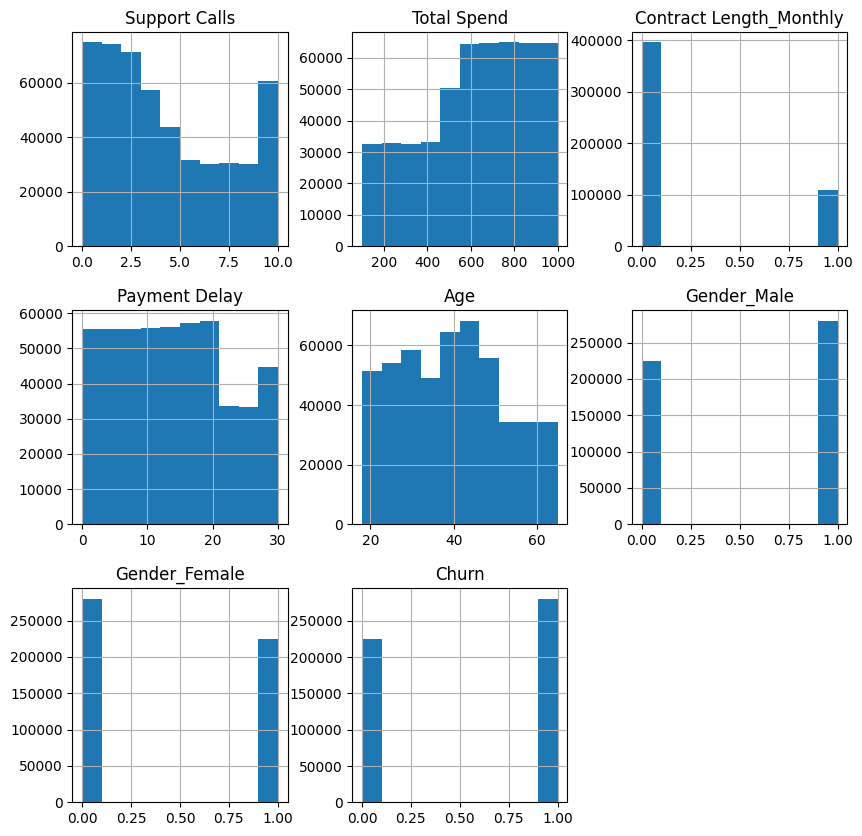

In [29]:
df_.hist(figsize=(10,10))

array([[<Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Contract Length_Monthly'}>],
       [<Axes: title={'center': 'Payment Delay'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender_Male'}>],
       [<Axes: title={'center': 'Gender_Female'}>,
        <Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

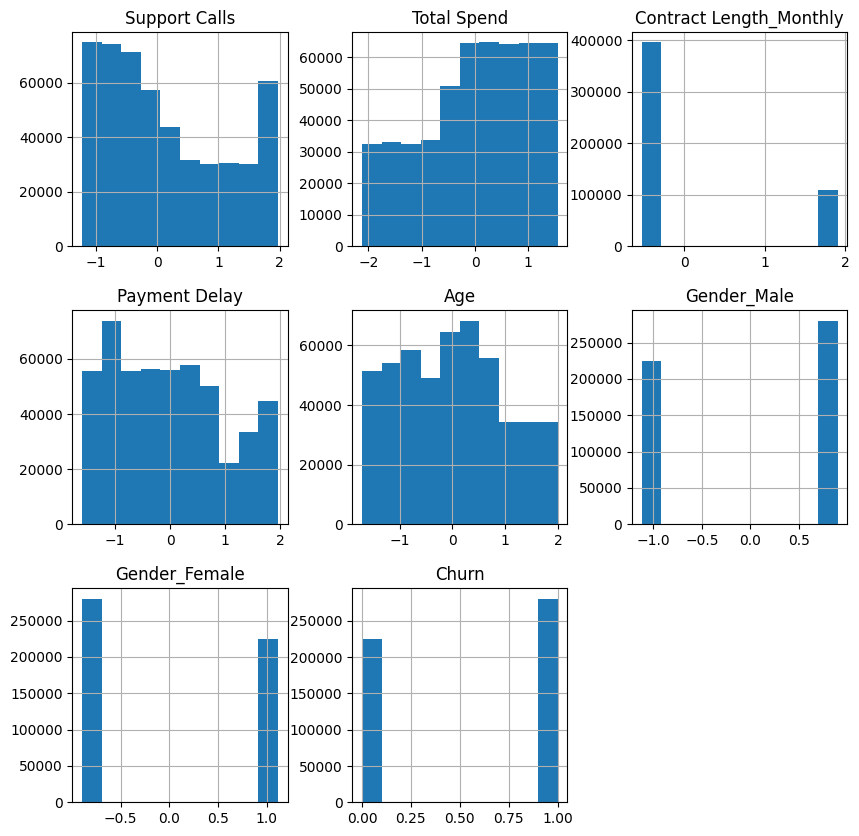

In [30]:
# Standarize the Variables
for col in df_.columns:
    if col != "Churn":
        df_[col] = (df_[col] - df_[col].mean()) / (df_[col].std())


df_.hist(figsize=(10,10))

In [31]:
from sklearn.utils import resample

# Separate majority and minority classes
minority = df_[df_["Churn"] == 0]
majority = df_[df_["Churn"] == 1]

# Downsample majority class to match minority
majority_downsampled = resample(majority,
                                replace=False,
                                n_samples=len(minority),
                                random_state=42)

# Combine to get balanced dataframe
df_balanced = pd.concat([majority_downsampled, minority])

# Shuffle the rows
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced.describe()

,Support Calls,Total Spend,Contract Length_Monthly,Payment Delay,Age,Gender_Male,Gender_Female,Churn
count,449428.000000,449428.000000,449428.000000,449428.000000,449428.000000,449428.000000,449428.000000,449428.000000
mean,-0.056840,0.041181,-0.040845,-0.036559,-0.021700,0.018575,-0.018575,0.500000
std,0.985782,0.984724,0.970576,0.985677,0.984172,0.997778,0.997778,0.500001
min,-1.223294,-2.119708,-0.525226,-1.597035,-1.712958,-1.116256,-0.895850,0.000000
25%,-0.904173,-0.590590,-0.525226,-0.887076,-0.844805,-1.116256,-0.895850,0.000000
50%,-0.265930,0.159697,-0.525226,-0.058790,-0.055575,0.895850,-0.895850,0.500000
75%,0.691435,0.852898,-0.525226,0.651170,0.654732,0.895850,1.116256,1.000000
max,1.967921,1.550176,1.903938,1.952762,1.996423,0.895850,1.116256,1.000000


In [32]:
num_of_zeros = len(df_balanced[df_balanced["Churn"] == 0])
num_of_ones = len(df_balanced[df_balanced["Churn"] == 1])

print(f"Number Of Zero's {num_of_zeros}")
print(f"Number Of One's {num_of_ones}")

Number Of Zero's 224714
Number Of One's 224714


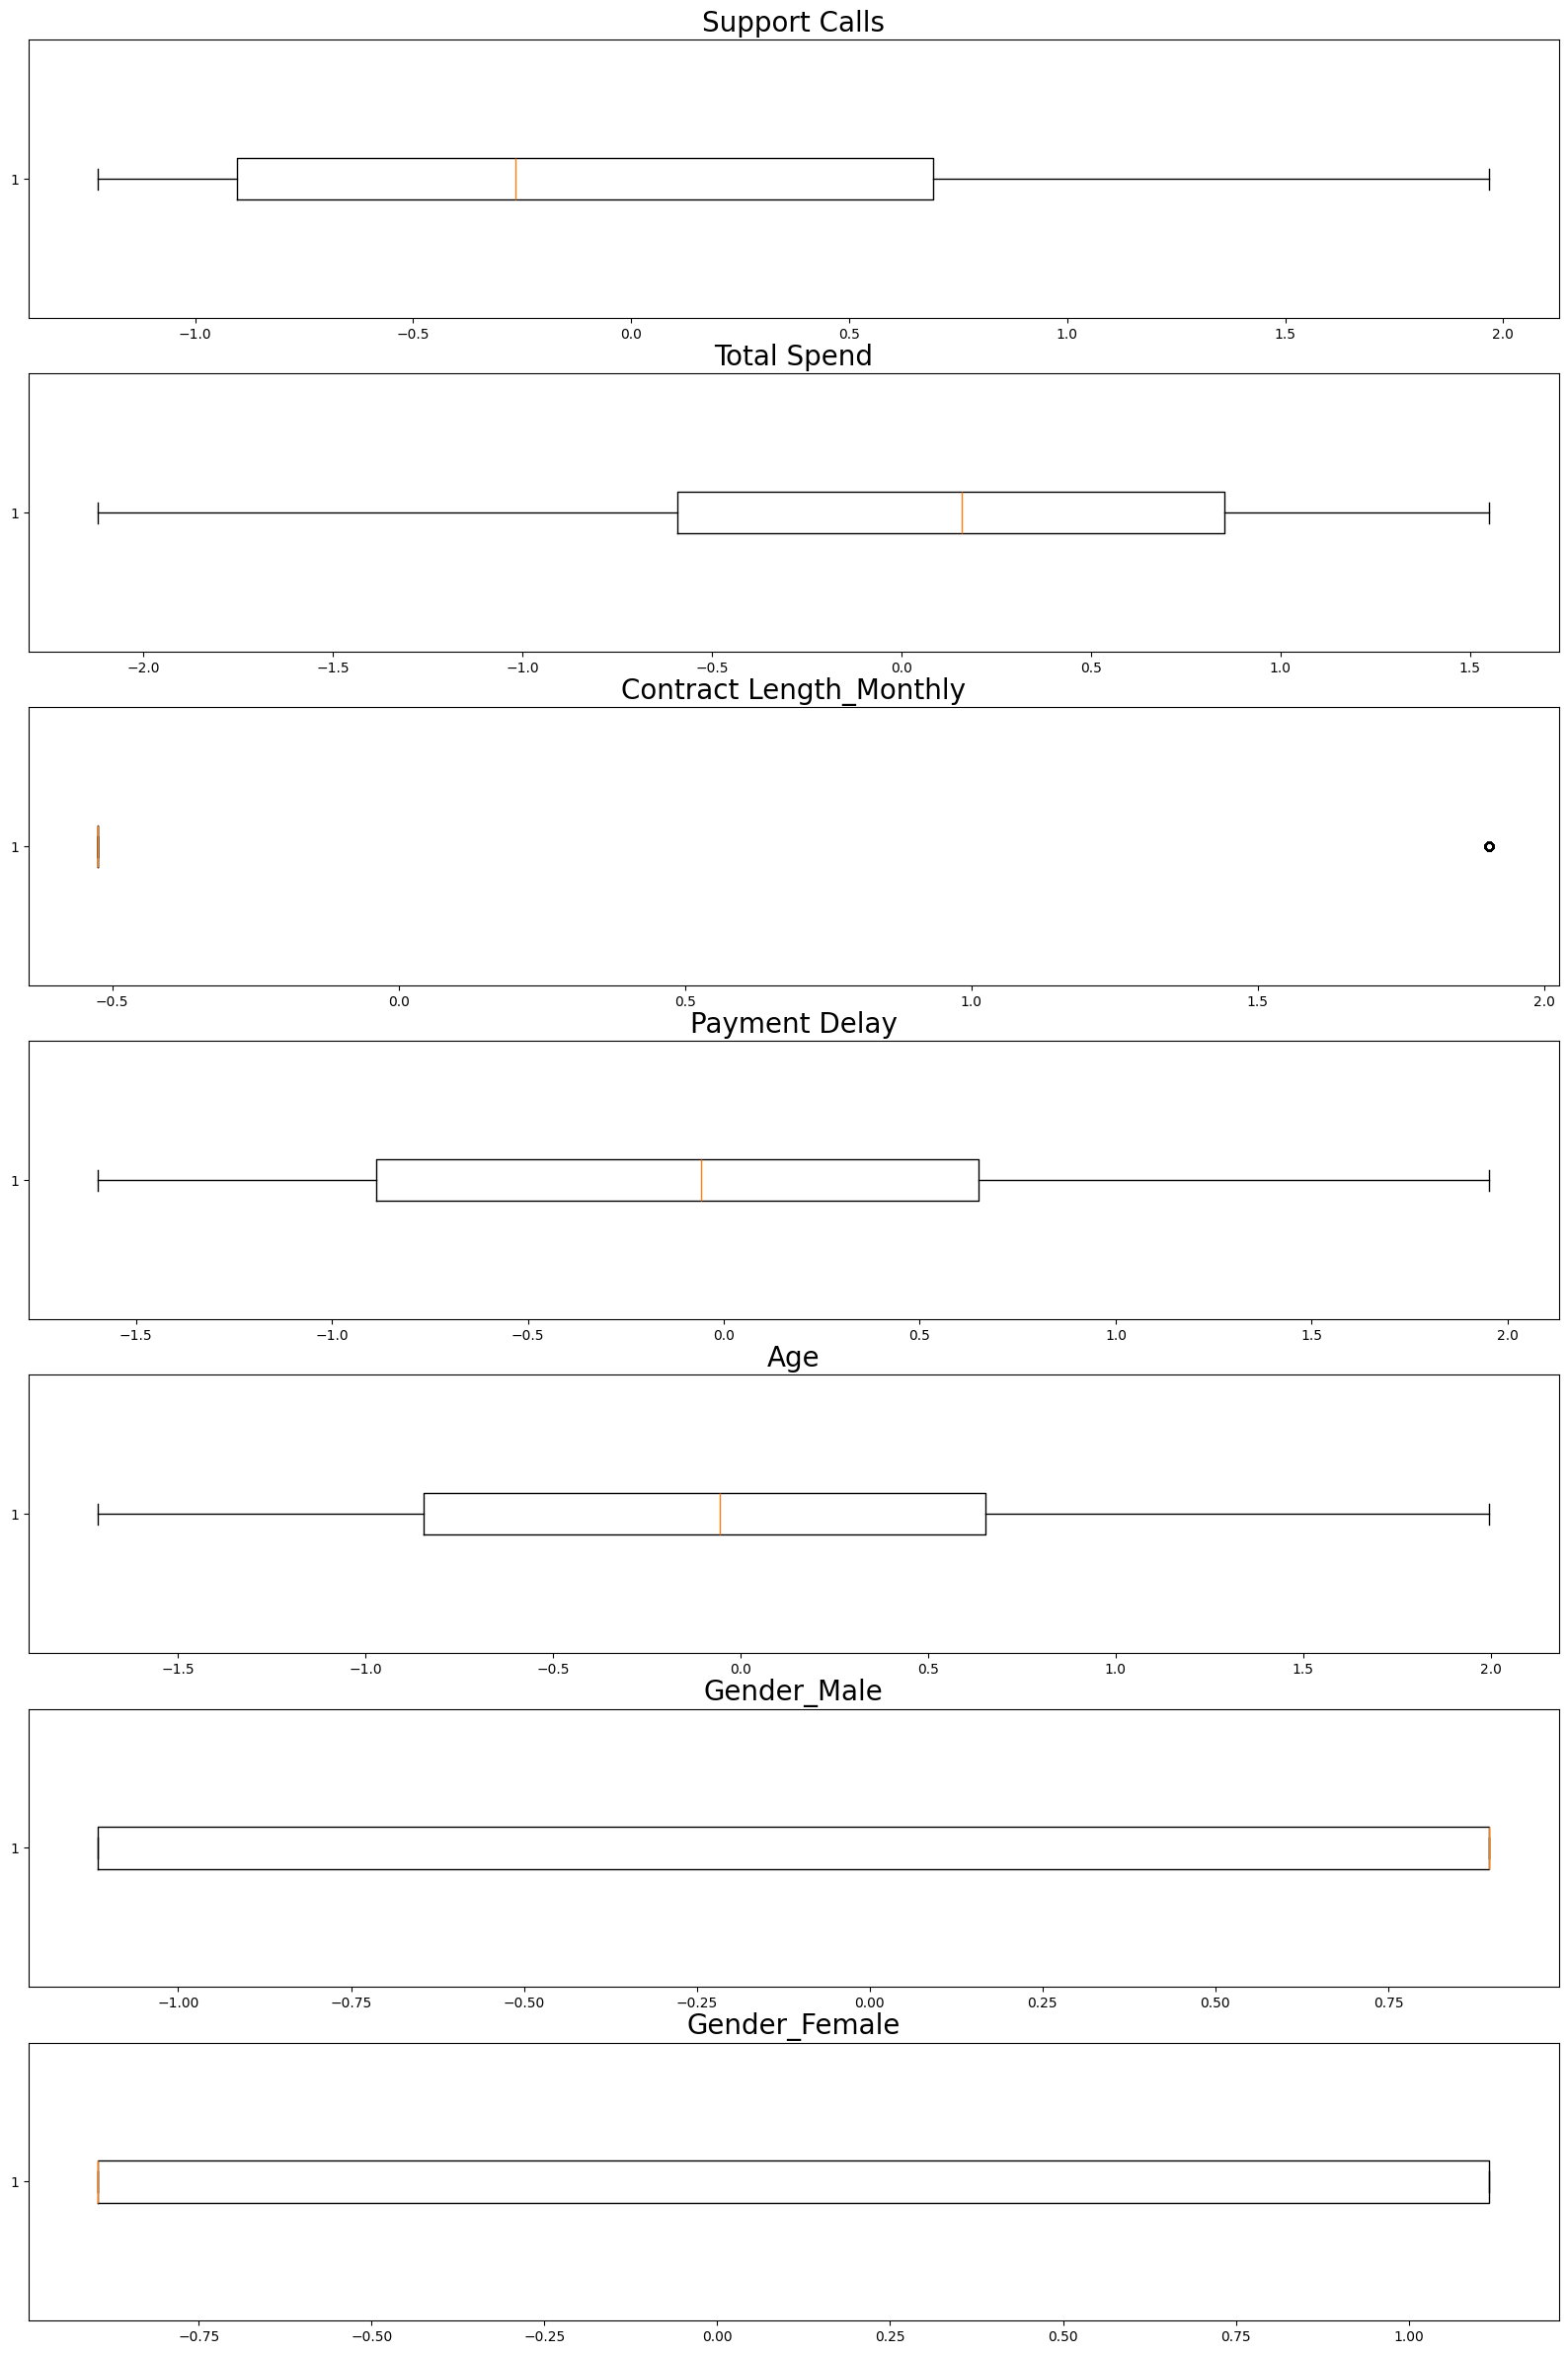

In [39]:
fig, axs = plt.subplots(len(columns), 1, figsize=(20, 30))  
for i, col in enumerate(columns):
    axs[i].boxplot(df_balanced[col], vert=False)
    axs[i].set_title(col)
    axs[i].title.set_size(20)


plt.show()

In [34]:
# Save data to csv
df_balanced.to_csv("Data/Clean_Standard_Data.csv", index=False)